<a href="https://colab.research.google.com/github/Paavani-git/Computer_vision/blob/main/LAB4_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 19ECE384 Computer Vision Programming Lab
## Labsheet #4
## Canny Edge Detector
Name:Poluru Pavani

Roll Number:AM.EN.U4EAC19041


-----
An edge in an image refers to the continuum of neighboring (connected) spatial coordinates with a large change of intensity values for the pixels from the two opposite sides of these spatial coordinates. For example, a horizontal edge is a set of connected spatial cordinates parallel to the horizontal axis, such that, the pixel values above these coordinates are nearly white, whereas, all the pixel values below these coordinates are nearly black. In such a case, the above set of coordinates produces a visual edge in the image. Note that, an edge in image is similar to a step signal that you have previously studied in the case of 1-D signals. The following figure shows three different types of edges, namely, a horizontal edge, a vertical edge, and an inclined (with angle $45^{\circ}$) edge. The angle between the edge and the horizontal axis of the image is called the **direction of the edge**. Note that, the edge direction has a range $[0,\pi]$.

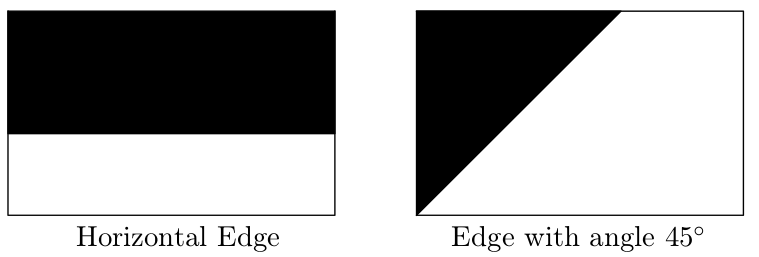

An edge detection algorithm detects all the important edges of an image. Such an algorithm generally produces an output image with all edges shown in white color against a black background (regions without edges). Canny edge detection algorithm consists of a sequence of steps that generates an edge image (edge map) from a given input image. An example input image, and the output image obtained from the Canny edge detection algorithm are shown below.

#### Input Image
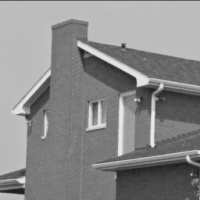

#### Edge Image
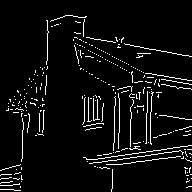

The sequence of operations used by the Canny edge detection algroithm are given below. Before you proceed, you may mount your google drive, load a test image (different from the one shown above), and convert the image data type into ``float64``, in the following code cell.


In [ ]:

import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Canny Edge Detection Algorithm - Steps
### 1. Image Smoothing
The noise contained in the image may cause abrupt changes in the intensity values of the neighboring pixels, These abrupt changes may cause false .detection of edges. In order to reduce noise, the image is first blurred (low pass filtered) with a Gaussian mask. In the previous labsheet, you have used a constant mask with all values set to $\frac{1}{9}$ for smoothing. However, this may overly smooth the image, we use a better mask, whose values are chosen according to 2-D Gaussian surface. The Gaussian mask and the smoothed image produced by this mask are shown below. Write your code for Gaussian smoothing in the following code cell.






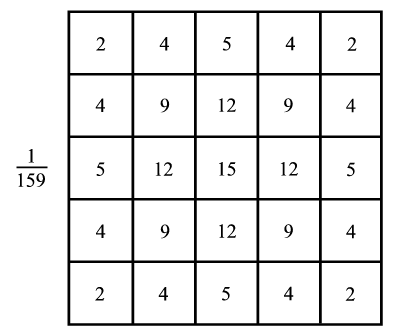

#### Smoothed Image
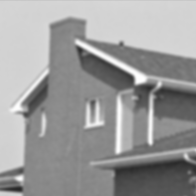

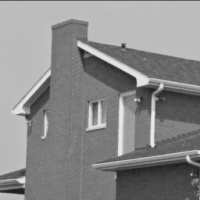

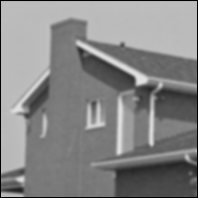

In [ ]:
I = cv2.imread('/content/gdrive/MyDrive/Computer vision/House.png',0)
cv2_imshow(I)
I = I.astype(np.float64)
w = 2
I1 = np.zeros((I.shape[0]-2,I.shape[1]-2));
mask = np.array([[2/159,4/159,5/159,4/159,2/159],[4/159,9/159,12/159,9/159,4/159],[5/159,12/159,15/159,12/159,5/159],[4/159,9/159,12/159,9/159,4/159],[2/159,4/159,5/159,4/159,2/159]]);
m = I.shape[0]
n = I.shape[1]
for i in range (w,m-w):
      for j in range (w,n-w):
        slc = I[i-2:i+3,j-2:j+3];
        I1[i-1,j-1] = np.sum(np.multiply(slc,mask));
cv2_imshow(I1)

### 2. Compute the Gradient Strength and Direction
As edges correspond to abrupt changes in the intensity levels along the edge direction, image edges can be detected by computing the derivative. We know that, image derivative will be very high on an edge point. Hence, we first compute the image gradient along horizontal and vertical directions using Sobel masks shown below. In the previous experiment, you have already used Sobel filters to compute the image gradient. We compute two images $I_x$ and $I_y$ by applying the two different Sobel masks shown below. The gradient image $G(x,y)$ is then computed as
$$ G(x,y) = \sqrt{I_x(x,y)^2+I_y(x,y)^2} $$.
Note that, at any spatial coordinate $(x,y)$, $G(x,y)$ stores the magnitude of the gradient. We also compute another image $D(x,y)$ which stores the direction of the gradient at any spatial coordinate $(x,y)$. The direction at a given $(x,y)$ can be computed as,
$$D(x,y) = \mathrm{tan}^{-1}(\frac{I_y(x,y)}{I_x(x,y)}$$
The direction of gradient at any edge point is orthogonal to the direction of the edge. The figure below shows the gradient image $D(x,y)$. Write your code for computing $G(x,y)$ and $D(x,y)$ in the following code cell.

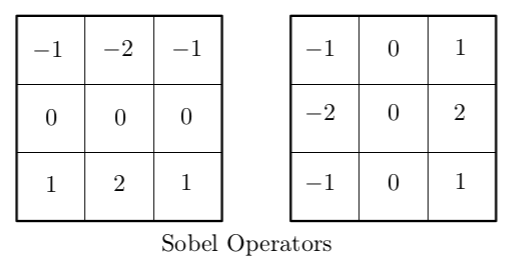

#### Gradient Image
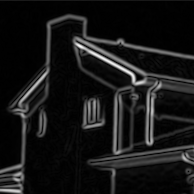

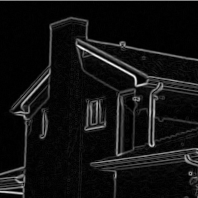

In [ ]:
w = 1
J = np.zeros((I.shape[0]-2,I.shape[1]-2));
k = np.zeros((I.shape[0]-2,I.shape[1]-2));
mask = np.array([[-1,-2,-1],[0,0,0],[1,2,1]]);
m = I.shape[0]
n = I.shape[1]
for i in range (w,m-w):
  for j in range (w,n-w):
    slc = I[i-1:i+2,j-1:j+2];
    J[i-1,j-1] = np.sum(np.multiply(slc,mask));
mask = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
for i in range (w,m-w):
  for j in range (w,n-w):
    slc = I[i-1:i+2,j-1:j+2];
    k[i-1,j-1] = np.sum(np.multiply(slc,mask));
J = J*J
k = k*k
out = J+k
out = np.sqrt(out)
maxx = np.amax(out)
out = out*255/maxx
cv2_imshow(out)

In [ ]:
w = 1
J = np.zeros((I.shape[0]-2*w,I.shape[1]-2*w));
k = np.zeros((I.shape[0]-2*w,I.shape[1]-2*w));
mask = np.array([[-1,-2,-1],[0,0,0],[1,2,1]]);
m = I.shape[0]
n = I.shape[1]
for i in range (w,m-w):
  for j in range (w,n-w):
    slc = I[i-1:i+2,j-1:j+2];
    J[i-1,j-1] = np.sum(np.multiply(slc,mask));
mask = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
for i in range (w,m-w):
  for j in range (w,n-w):
    slc = I[i-1:i+2,j-1:j+2];
    k[i-1,j-1] = np.sum(np.multiply(slc,mask));
direction = np.arctan(k/j)

### 3. Non-maximum Suppression
In the above figure, we can see that the edges have already been detected. But, most of the edges are overly thick. We wish to have thin edges that ideally have a width of just 1 pixel. In order to get this, we check the gradient intensity values in the orthognal direction (the direction that computed in the previous step) at every edge point. If an edge is too thick, then, the gradient will have many large pixel values along the orthogonal direction. Among these, we choose the highest value and suppress all others. An example is shown in the following figure. Here, the spatial coordinate $(i,j)$ is a part of a vertical edge. Hence, the edge direction as computed above points to the horizontal direction. **Along** this direction, we search for the gradient values at two neighboring coordiates of $(i,j)$, which are at $(i,j-1)$ and $(i,j+1)$. If the intensity of the gradient is larger in **any** of these neighbors when compared to the gradient intensity at $(i,j)$, we have a better gradient value at a neighboring coordinate. Hence, we set the gradient value at $(i,j)$ to zero. If the gradient value at $(i,j)$ is the largest among the three gradient values at $(i,j)$, $(i,j-1)$ and $(i,j+1)$, then, all the three values are retained as it is. The above procedure is repeated by visiting the gradient values at every $(i,j)$  from top left to the bottom right.

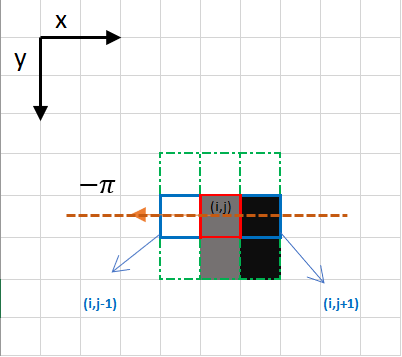

Another example is shown in the following figure. In this case, the edge is along a line that makes $45^{\circ}$ with the x-axis, and hence, the direction computed above points in the direction of a line that makes $135^{\circ}$ with the x-axis. Note that, the neigboring pixels to be considered in this case are $(i-1,j+1)$ and $(i+1,j-1)$.

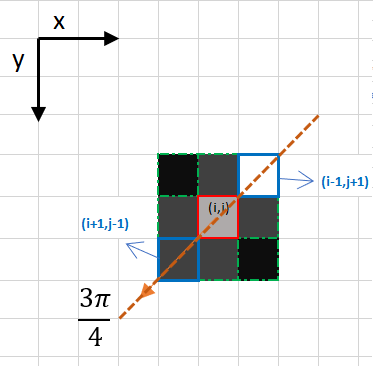

Though the direction can be any angle between $0$ and $\pi$, we cannot search in all the directions, because, the image is discrete. Hence, we quantize the possible directions between $0$ and $\pi$ into 4 regions, such that, the corresponding search will be along the horizontal, vertical, and the two diagonal directions. Thus, we search horizontally for all the angles $0$ to $22.5^{\circ}$ and $157.5^{\circ}$ to $180^{\circ}$. Similarly, for all the angles $22.5^{\circ}$ to $67.5^{\circ}$, the search is along the first diagonal. The directions and the corresponding search directions are summarized in the following.

$0-22.5^{\circ}$ and $157.5^{\circ}-180^{\circ}$ $\Rightarrow$ horizontal

$22.5^{\circ}-67.5^{\circ}$ $\Rightarrow$ first diagonal (shown above)

$67.5^{\circ}-112.5^{\circ}$ $\Rightarrow$ vertical

$112.5^{\circ}-157.5^{\circ}$ $\Rightarrow$ second diagonal

The following figure shows the output of Non-maxium suppression. Write your code for Non-maxium suppression in the code cell given below.

#### Non-maxium Suppressed Image
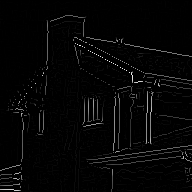

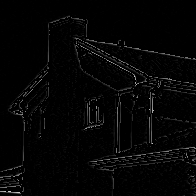

In [ ]:
# Non-maxium Supression
d = d*180/np.pi
d[d<0] += 180

g_s = np.zeros((out.shape[0]-2,out.shape[1]-2))
for m in range(out.shape[0]-1) :
  for n in range(out.shape[1]-1) :
    if((d[m,n] >= 0 and d[m,n] < 22.5)or(d[m,n]>=157.5 and d[m,n]<=180)) :
      c1 = out[m,n-1]
      c2 = out[m,n+1]
    elif(d[m,n] >= 22.5 and d[m,n] < 67.5) :
      c1 = out[m-1,n+1]
      c2 = out[m+1,n-1]
    elif(d[m,n] >=67.5 and d[m,n] < 112.5) :
      c1 = out[m-1,n]
      c2 = out[m+1,n]
    else :
      c1 = out[m-1,n-1]
      c2 = out[m+1,n+1]
    if(out[m,n] > c1 and out[m,n] < c2) :
      g_s[m-1,n-1] = out[m,n]
    else :
      g_s[m-1,n-1] = 0
cv2_imshow(g_s)

### 4. Double Thresholding
The gradient image with suppressed Non-maximum values contains strong edge points, weak edge points, and non-edge points. Strong edge points are those which are guaranteed to be a part of some of the edges. For such points, the gradient value will be significantly large. Weak edge points may be a part of an edge, or some noisy points which are isolated and not connected to any of the edges. For such points, generally, the gradient intensity will be smaller than that of strong points. Non-edge points are those which guaranteed to be not a part of any of the edges, and hence belong to the smooth regions of the image. For such points, gradient intensity will be less than that of weak edge points. Double thresholding produces two edge images, namely, a strong edge image ($S(x,y)$ and a weak edge image $W(x,y)$ from the Non-maxium suppressed gradient image denoted as $G_s(x,y)$. It uses two thresholds, $T_s$ and $T_w$, for computing the strong and weak edge images as,

$S(x,y) = 255$ if $G_s(x,y) \geq T_s$, and $0$ otherwise.

$W(x,y) = 255$ if $T_w \leq G_s(x,y) < T_s$,  and $0$ otherwise. The strong and weak edge images are shown below. Write your code for computing strong and weak edge images in the following code cell.

#### Strong Edges
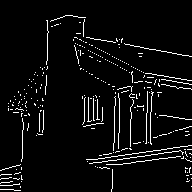

#### Weak Edges
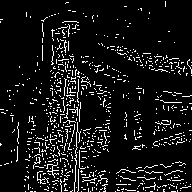

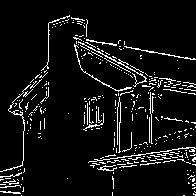

In [ ]:
## Double Thresholding
HT = g_s.max()*0.09
LT = g_s.max()*(0.01)
strong = np.zeros((g_s.shape[0],g_s.shape[1]))
weak  = np.zeros((g_s.shape[0],g_s.shape[1]))
for m in range(g_s.shape[0]) :
  for n in range(g_s.shape[1]) :
    if(g_s[m,n] > LT and g_s[m,n] < HT) :
      weak[m,n] = 255
    if(g_s[m,n] >= HT) :
      strong[m,n] = 255
weak = weak*255/np.amax(weak)
strong = strong*255/np.amax(strong)
cv2_imshow(strong)

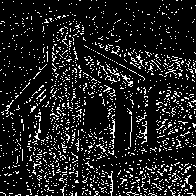

In [ ]:
cv2_imshow(weak)

### 5. Edge Tracking by Hysteresis
As can be observed from the weak edge image, the weak edge points may be a part of an edge, or it may be some noisy isolated points not connected to any of the edges. We have to retain only those edge points which are likely to be connected to some of the edges, and remove all the others. Edge tracking by hysteresis produces the final edge image $E(x,y)$ by removing the noisy weak edge points and adding all the important weak edge points to the list of strong edge points. Towards this, we use the following steps.
1. Initialize $E(x,y)$ as $E(x,y)=S(x,y)$.
1. Visit every spatial coordinate $(i,j)$ of the weak edge image.
2. If it is a weak edge point at $(i,j)$, i.e., $W(i,j) = 255$, extract a $3 \times 3$ neighborhood around $(i,j)$ in the corresponding **strong edge** image.

3. If there exists at least one strong edge point in the $3\times 3$ neighborhood mentioned in the above step, set $E(i,j) = 255$, This ensures that the coordinate $(i,j)$ is considered to be a part of a strong edge.

The above procedure is graphically represented in the following figure.

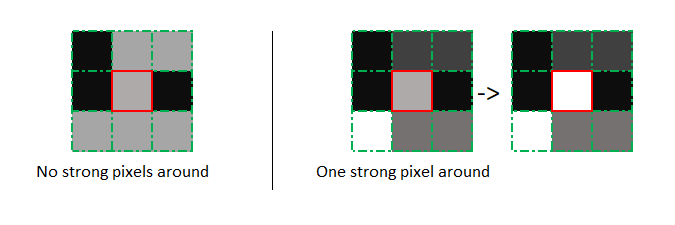

The figure below shows the final edge image $E(x,y)$. Write you code for hysteresis based edge tracking in the following code cell.

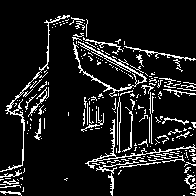

In [ ]:
edge = strong
for m in range(1,weak.shape[0]-1) :
  for n in range(1,weak.shape[1]-1) :
    if(weak[m,n] > 0) :
      if(strong[m-1,n-1] > 0 or strong[m-1,n] > 0 or strong[m-1,n+1] > 0 or strong[m,n-1] >0 or strong[m,n+1] > 0 or strong[m+1,n-1] >0 or strong[m+1,n] >0 or strong[m+1,n+1] > 0 ) :
        edge[m,n] = 255
cv2_imshow(edge)